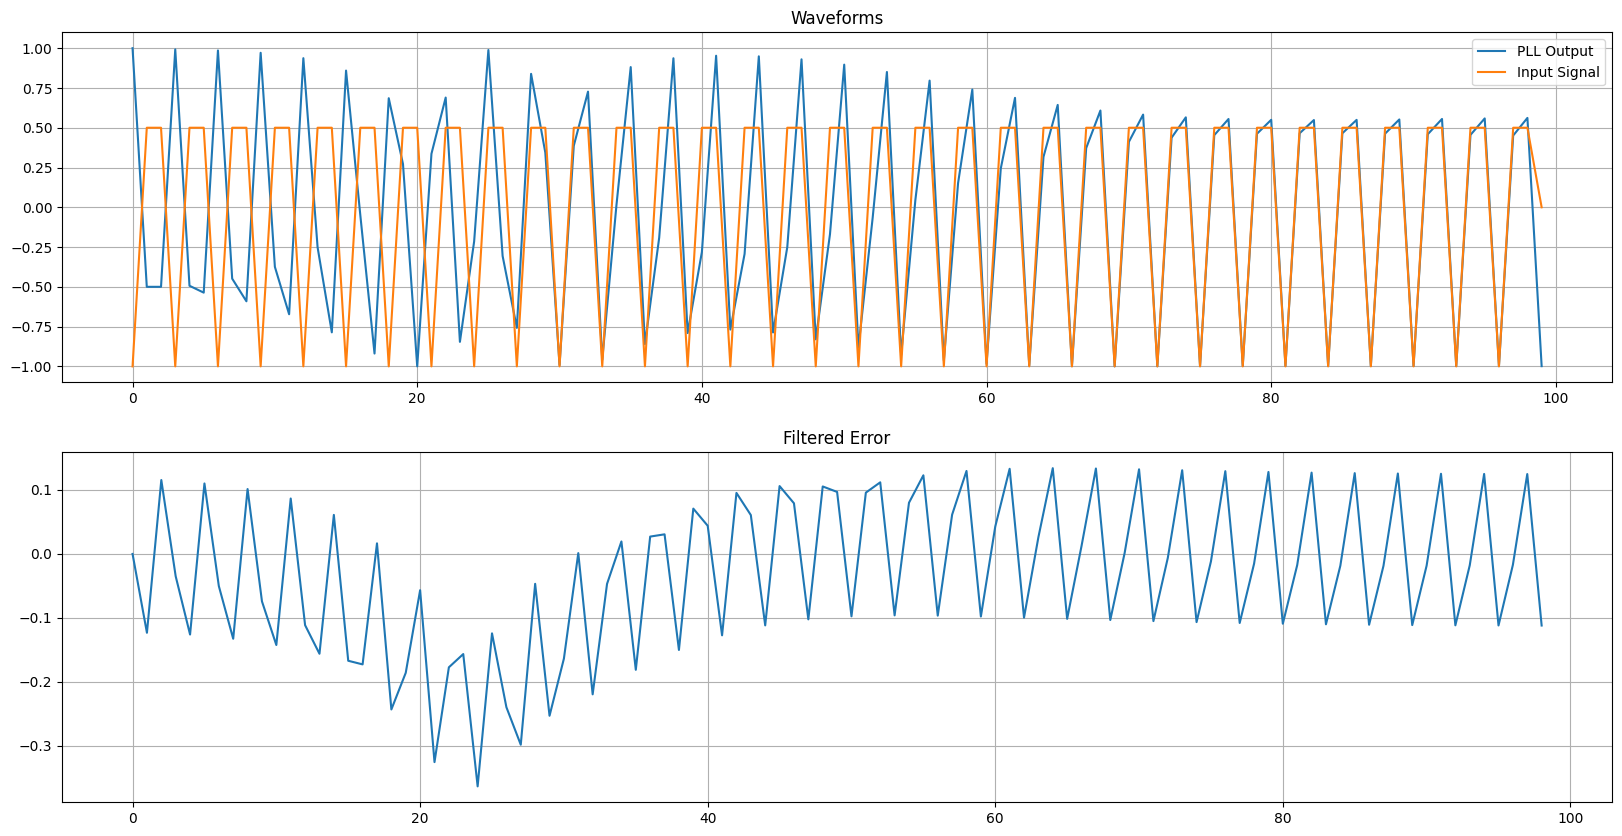

In [7]:
# The original

# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np

k = 1
N = 3
K_p = 0.2667
K_i = 0.0178
K_0 = 1

input_signal = np.zeros(100)

integrator_out = 0
phase_estimate = np.zeros(100)
e_D = [] #phase-error output
e_F = [] #loop filter output
sin_out = np.zeros(100)
cos_out = np.ones(100)

for n in range(99):
    input_signal[n] = np.cos(2*np.pi*(k/N)*n + np.pi)

    # phase detector
    try:
        e_D.append(input_signal[n] * sin_out[n])
    except IndexError:
        e_D.append(0)

    #loop filter
    integrator_out += K_i * e_D[n]
    e_F.append(K_p * e_D[n] + integrator_out)


    #NCO
    try: 
        phase_estimate[n+1] = phase_estimate[n] + K_0 * e_F[n]
    except IndexError:
        phase_estimate[n+1] = K_0 * e_F[n]

    sin_out[n+1] = -np.sin(2*np.pi*(k/N)*(n+1) + phase_estimate[n])
    cos_out[n+1] = np.cos(2*np.pi*(k/N)*(n+1) + phase_estimate[n])

# Create a Figure
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

# Set up Axes
ax1 = fig.add_subplot(211)
ax1.plot(cos_out, label='PLL Output')
plt.grid()
ax1.plot(input_signal, label='Input Signal')
plt.legend()
ax1.set_title('Waveforms')

# Show the plot
#plt.show()

ax2 = fig.add_subplot(212)
ax2.plot(e_F)
plt.grid()
ax2.set_title('Filtered Error')
plt.show()